In [1]:
#!pip install imbalanced-learn

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import train_test_split.
from sklearn.model_selection import train_test_split

# Import logistic regression
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import (confusion_matrix, plot_confusion_matrix,
                             accuracy_score, plot_roc_curve, roc_auc_score,
                             recall_score, precision_score, f1_score)

from sklearn.preprocessing import StandardScaler


from imblearn.over_sampling import SMOTE

In [3]:
songs = pd.read_csv('data/songs_clean.csv')
songs.head()

,artist,album,release_date,track_name,track_id,popularity,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,hit,release_day,release_month,release_year
0,Faith Hill,Breathe,1999-11-09,Breathe,3y4LxiYMgDl4RethdzpmNe,66,0.529,0.496,7,-9.007,...,0.000000,0.2510,0.278,136.859,250547,4,1,9,11,1999
1,Santana,Supernatural (Remastered),1999-06-15,Smooth (feat. Rob Thomas),0n2SEXB2qoRQg171q7XqeW,69,0.609,0.923,9,-3.908,...,0.000005,0.2950,0.961,115.996,294987,4,1,15,6,1999
2,Various Artists,Pure... 2000s Party,2014-08-29,Maria Maria (feat. The Product G&B) - Radio Edit,3mZjcZH6CEp4YBm7iz3P7l,49,0.755,0.744,4,-5.042,...,0.000013,0.0263,0.819,97.923,237920,4,1,29,8,2014
3,Joe,My Name Is Joe,2000-04-18,I Wanna Know,1m2xMsxbtxv21Brome189p,65,0.725,0.487,8,-5.959,...,0.000011,0.4310,0.599,136.086,296693,4,1,18,4,2000
4,Vertical Horizon,Everything You Want,1999-06-14,Everything You Want,4cKGldbhGJniI8BrB3K6tb,64,0.636,0.761,3,-6.389,...,0.000000,0.0642,0.736,93.896,257067,4,1,14,6,1999


In [4]:
songs.columns

Index(['artist', 'album', 'release_date', 'track_name', 'track_id',
       'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'hit', 'release_day', 'release_month',
       'release_year'],
      dtype='object')

In [5]:
songs['release_date'] = pd.to_datetime(songs['release_date'])

In [6]:
songs = songs[(songs['release_date'].dt.year >=2015)]

In [7]:
songs['hit'].value_counts(normalize=True)

0    0.866076
1    0.133924
Name: hit, dtype: float64

From the initial data pull, the classes are extremely unbalanced. In order to address the imbalanced classes, I defined a SMOTE instance that will balance the minority class.

In [42]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4062 entries, 6 to 10484
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   artist            4062 non-null   object        
 1   album             4062 non-null   object        
 2   release_date      4062 non-null   datetime64[ns]
 3   track_name        4062 non-null   object        
 4   track_id          4062 non-null   object        
 5   popularity        4062 non-null   int64         
 6   danceability      4062 non-null   float64       
 7   energy            4062 non-null   float64       
 8   key               4062 non-null   int64         
 9   loudness          4062 non-null   float64       
 10  mode              4062 non-null   int64         
 11  speechiness       4062 non-null   float64       
 12  instrumentalness  4062 non-null   float64       
 13  liveness          4062 non-null   float64       
 14  valence           4062 

In [8]:
features = ['release_day','release_month','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

In [9]:
X = songs[features]
y = songs['hit']

# transform the dataset
sm = SMOTE(random_state=77)
X, y = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 77)

sc = StandardScaler()
sc.fit(X_train) # Learns the means and standard deviations for each columns

#Using the fit StandardScaler - transform the data
Z_train = sc.transform(X_train)
Z_test = sc.transform(X_test)

In [10]:
X_test.shape

(1759, 14)

In [11]:
y_test.value_counts(normalize=True)

1    0.500284
0    0.499716
Name: hit, dtype: float64

## Logistic Regression

In [12]:
#lr = LogisticRegression(penalty='l1',solver='liblinear')
lr = LogisticRegression()
lr.fit(Z_train,y_train)

# Step 4 (part 1): Generate predicted values.
lr_preds = lr.predict(Z_test)

In [13]:
# Step 4 (part 2): Generate predicted probabilities.
lr.predict_proba(Z_test)[:10]

array([[6.93989811e-01, 3.06010189e-01],
       [4.95022299e-01, 5.04977701e-01],
       [7.79383920e-01, 2.20616080e-01],
       [5.92465576e-01, 4.07534424e-01],
       [9.99939004e-01, 6.09958665e-05],
       [1.15674086e-01, 8.84325914e-01],
       [7.31844855e-01, 2.68155145e-01],
       [3.98818168e-01, 6.01181832e-01],
       [8.77704812e-01, 1.22295188e-01],
       [5.51722823e-01, 4.48277177e-01]])

In [14]:
# Step 5: Evaluate model.
lr.score(Z_train, y_train)

0.7439833238582528

In [15]:
#Accuracy Score 
lr.score(Z_test, y_test) #This is showing that with the model is correct 83% of the time

0.7396247868106879

In [16]:
confusion_matrix(y_test,lr_preds)

array([[618, 261],
       [197, 683]], dtype=int64)

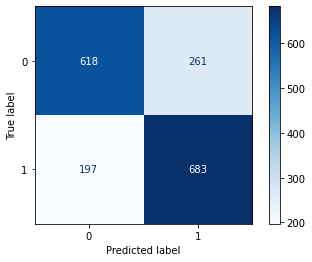

In [17]:
tn, fp, fn, tp = confusion_matrix(y_test, lr_preds).ravel()
plot_confusion_matrix(lr, Z_test, y_test, cmap='Blues', values_format='d');

In [18]:
# Calculate the specificity
recall_score(y_test, lr_preds)

0.7761363636363636

In [19]:
precision_score(y_test, lr_preds)

0.7235169491525424

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lr_preds))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       879
           1       0.72      0.78      0.75       880

    accuracy                           0.74      1759
   macro avg       0.74      0.74      0.74      1759
weighted avg       0.74      0.74      0.74      1759



In [21]:
# # Visualizing logistic regression probabilities.

# plt.figure(figsize = (10, 5))

# plt.scatter(X_test, y_test, s = 10);

# plt.plot(X_test,
#          model.predict_proba(X_test)[:,1],
#          color = 'grey', alpha = 0.8, lw = 3)

# plt.xlabel('Song Features')
# plt.ylabel('Hit')
# plt.title('Predicting Billboard Hits from Song Features');

## KNN Model

In [25]:
knn = KNeighborsClassifier()

#Metric - accuracy (classification)
# correct number of predictions / total number of predictions

cross_val_score(knn, Z_train, y_train).mean()

0.7669129685480396

In [26]:
#When we fit the KNN model, we want to use the Z_train and y_train values
knn.fit(Z_train,y_train)
knn.predict(Z_train)

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [27]:
knn.score(Z_train,y_train)

0.8497252226643927

In [28]:
knn.score(Z_test,y_test) 

0.7680500284252416

In [29]:
knn_preds = knn.predict(Z_test)

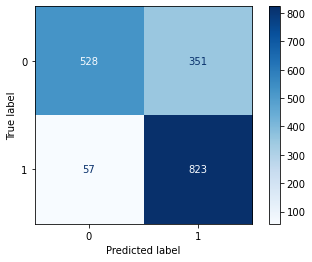

In [30]:
tn, fp, fn, tp = confusion_matrix(y_test, knn_preds).ravel()
plot_confusion_matrix(knn, Z_test, y_test, cmap='Blues', values_format='d');

In [31]:
# Calculate the specificity
recall_score(y_test, knn_preds)

0.9352272727272727

In [32]:
precision_score(y_test, knn_preds)

0.7010221465076661

# Random Forest

In [33]:
rf = RandomForestClassifier(random_state=50, n_jobs=4)

rf_params = {
    'n_estimators': [200,250,300,350],
    'max_features': ['auto'],
    'max_depth': [5,6,7],
    'min_samples_leaf': [1,2,3,4],
    'ccp_alpha': [0.0001, 0.001,0.01,0]
}

rf_gs = GridSearchCV(rf, 
                  param_grid=rf_params, 
                  cv=5,
                 verbose=1,
                 n_jobs=6)

rf_gs.fit(Z_train,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=4, random_state=50),
             n_jobs=6,
             param_grid={'ccp_alpha': [0.0001, 0.001, 0.01, 0],
                         'max_depth': [5, 6, 7], 'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'n_estimators': [200, 250, 300, 350]},
             verbose=1)

In [34]:
rf_gs.best_params_

{'ccp_alpha': 0.0001,
 'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'n_estimators': 200}

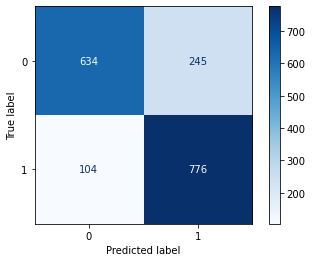

In [35]:
rf_preds = rf_gs.predict(Z_test)

tn, fp, fn, tp = confusion_matrix(y_test, rf_preds).ravel()
plot_confusion_matrix(rf_gs, Z_test, y_test, cmap='Blues', values_format='d');

In [36]:
rf_gs.score(Z_train, y_train)

0.8447981807845367

In [37]:
rf_gs.score(Z_test, y_test)

0.801591813530415

In [38]:
# Calculate the specificity
recall_score(y_test, rf_preds)

0.8818181818181818

In [39]:
precision_score(y_test, rf_preds)

0.7600391772771793

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (GradientBoostingClassifier,
                              AdaBoostClassifier,
                              VotingClassifier)

knn_pipe = Pipeline([
    ('sc', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

vote = VotingClassifier([
    ('tree', DecisionTreeClassifier()),
    ('ada', AdaBoostClassifier()),
    ('gb', GradientBoostingClassifier()),
    ('knn_pipe', knn_pipe)
])
#saying cycle through the ada base estimator of decisiontreeclassifier with default max depth 1 and specified max depth 2
#we refer to the alias estimator first then doubleunderscore then the hyperparameters we want to optimize
vote_params = {
    'ada__base_estimator': [None, DecisionTreeClassifier(max_depth=2)], 
    'ada__n_estimators': [50,75], 
    'gb__n_estimators': [100,125],
    'tree__max_depth': [None, 5],
    'knn_pipe__knn__n_neighbors':[3,4,5] #the two double underscore refers to the knn_pipe alias and the knn alias parameters
}

gs = GridSearchCV(vote, param_grid=vote_params, cv=3, n_jobs=6)
gs.fit(Z_train, y_train)
print(gs.best_score_)
gs.best_params_

0.8398711389046807


{'ada__base_estimator': DecisionTreeClassifier(max_depth=2),
 'ada__n_estimators': 75,
 'gb__n_estimators': 125,
 'knn_pipe__knn__n_neighbors': 3,
 'tree__max_depth': None}

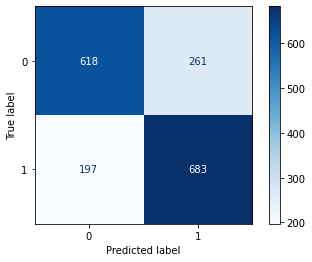

In [41]:
gs_preds = gs.predict(Z_test)
tn, fp, fn, tp = confusion_matrix(y_test, gs_preds).ravel()
plot_confusion_matrix(lr, Z_test, y_test, cmap='Blues', values_format='d');

## Neural Network